In [1]:
import os
import sys
import torch
import torch.nn as nn
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler, Subset
from torchvision import transforms
from PIL import Image
import numpy as np

import matplotlib.pyplot as plt

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))



%matplotlib inline

In [2]:
import datasets

In [3]:
import utils

In [4]:
dataset = getattr(datasets, "BrainMRIDataset")(
    root_dir="../data/brain_MRI_Buda/kaggle_3m",
    image_size=tuple([256, 256]),
    transform=None,
)

# Create data loaders
train_loader, val_loader, _ = datasets.create_split_loaders(
    dataset=dataset,
    batch_size=4
)


Image transform: Compose(
    Resize(size=(256, 256), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
    Normalize(mean=[0.5], std=[0.5])
)
Mask transform: Compose(
    Resize(size=(256, 256), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
)
Created data loaders:
  Training: 3144 samples
  Validation: 785 samples


In [5]:
images, masks = next(iter(train_loader))
images.shape, masks.shape

(torch.Size([4, 3, 256, 256]), torch.Size([4, 1, 256, 256]))

In [6]:
images[0].shape, masks[0].shape

(torch.Size([3, 256, 256]), torch.Size([1, 256, 256]))

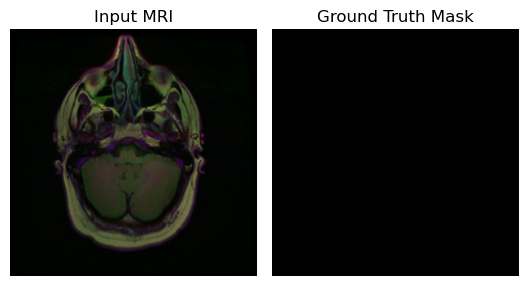

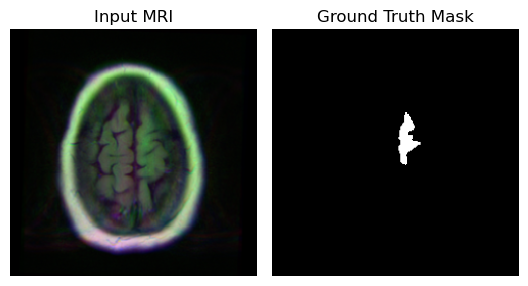

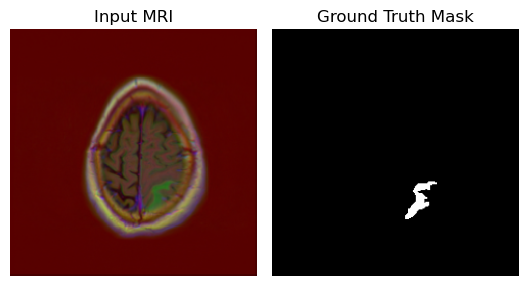

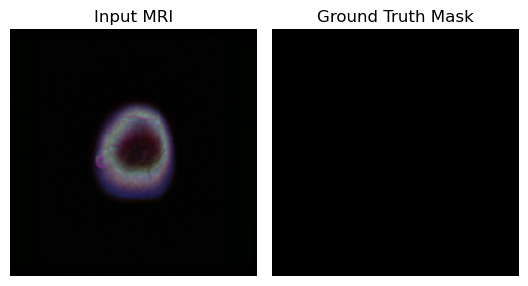

In [74]:
# get one batch
images = (images - images.min()) / (images.max() - images.min())
masks = masks * 255
augs = ["random_crop", "color_jitter", "random_rotation", "random_crop"]

# plot image and mask
import matplotlib.pyplot as plt

for i in range(4):
    img = images[i]
    mask = masks[i]
    # img, mask = datasets.random_rotation(img, mask)
    # img, mask = datasets.random_crop(img, mask)
    # img = datasets.color_jitter(img)
    img, mask = datasets.grid_distortion(img, mask)
    # img = datasets.gaussian_blur(img, radius_range=(100, 1000.0))
    # img = datasets.random_brightness_contrast(img, brightness_limit=0.2, contrast_limit=0.2)
    # img, mask = datasets.elastic_transform(img, mask, alpha=20, sigma=500, alpha_affine=600)

    plt.figure(figsize=(8, 4))
                    
    plt.subplot(1, 3, 1)
    plt.imshow(img.permute(1, 2, 0))
    plt.title("Input MRI")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(mask.squeeze(), cmap='gray')
    plt.title(f"Ground Truth Mask")
    plt.axis('off')

    plt.tight_layout()
    plt.show()